<img src="./files/universidad-nebrija.jpg" alt="Logo Nebrija" align="right" width=200>


<h2><font color="#004D7F" size=4>Lenguajes de Programación</font></h2>

<h1><font color="#004D7F" size=5>Algoritmo de conteo cuántico</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>José Javier Paulet González</font><br>
<font color="#004D7F" size=3>04/03/2024</font><br>
<font color="#004D7F" size=3>Universidad Antonio de Nebrija</font>

</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $

---

<h1><font color="#004D7F" size=15>Algoritmo de estimación de fase</font></h1>

 - Se trata de un algoritmo para estimar el autovalor de un autovector de un operador unitario.

 - Dado un operador cuántico $U$ (operador unitario) y un estado cuántico $\ket{\psi}$ (autovector) tal que $U\ket{\psi}=e^{2\pi i\phi}\ket{\psi}$, el algoritmo estima el autovalor $e^{2\pi i\phi}$, o lo que es lo mismo, estima la fase $\phi$ tal que $0\leq\phi<1$.

 - Esta estimación se realiza con una precisión de $p$ bits sobre un operador de tamaño $n$ qubits.


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

1. Se aplica puertas Hadamard a los primeros $p$ qubits.
2. Se aplican las puertas $\left(U^{2^{0}},U^{2^{1}},U^{2^{2}},\ldots,U^{2^{p-1}}\right)$ controladas por los qubits $\left(p-1,p-2,p-3,\ldots,0\right)$ más significativos.
3. Se aplica la transformada de Fourier inversa sobre los primeros $p$ qubits.
4. Se miden los $p$ primeros qubits.
<img src="./files/esquema-phase-estimation.png" alt="Circuito estimación de fase" align="left">

<h1><font color="#004D7F" size=15>Algoritmo de conteo cuántico</font></h1>

 - Se trata de un algoritmo para contar el número de soluciones de un problema.

 - Es una mezcla del algoritmo de Grover y el algoritmo de estimación de fase.

 - La complejidad temporal depende de la precisión que se desee.


 Para obtener el número de soluciones **M**, tenemos que obtener la fase del operador **G**. Este operador es una **iteración de Grover**, es decir, **Oráculo** $\left(U_{f}\right)$ + **Inversión sobre la media** $\left(U_{\psi}\right)$.
 Como podemos ver en la imagen, el operador **G** es un giro en sentido de las agujas del reloj de $2\theta$.
 
 
<img src="./files/iteración-grover-geometria.png" alt="Iteración de Grover"  width="300px" align="center">

Este operador **G** tiene 2 autovalores que son $e^{\pm i2\theta}$. Con el algoritmo del conteo cuántico se obtiene en la medición un valor $a=2^{p}\phi$ tal que el autovalor de **G** es $e^{2\pi i\phi}$. 

De esta forma, $2\theta=2\pi\phi=2\pi\frac{a}{2^{p}}$, es decir, $\theta=2\pi\frac{a}{2^{p+1}}$.
Con trigonometría podemos ver que $\sin{\left(\theta\right)}=\sqrt{\frac{M}{2^{n}}}$, por lo tanto, el número de soluciones es $M=2^{n}\cdot\sin^{2}{\left(\theta\right)}$


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

1. Se aplica puertas Hadamard a los primeros $p$ qubits y a los $n$ segundos qubits.
2. Se aplican las puertas $\left(G^{2^{0}},G^{2^{1}},G^{2^{2}},\ldots,G^{2^{p-1}}\right)$ controladas por los qubits $\left(p-1,p-2,p-3,\ldots,0\right)$ más significativos.
3. Se aplica la transformada de Fourier inversa sobre los primeros $p$ qubits.
4. Se miden los $p$ primeros qubits.
<img src="./files/esquema-quantum-counting.png" alt="Circuito conteo cuántico" align="left">

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Obtener el número de soluciones que tiene el problema SAT del fichero '3sat.dimacs'. Para ello se deberá construir un oráculo de fase.
El fichero se encuentra en la carpeta 'files'.

Un oráculo de fase es un operador que actúa únicamente en los qubits de entrada e invierte la amplitud de probabilidad de los estados solución. De esta forma no utiliza registros de trabajo ni el qubit extra para aplicar el **phase kickback** (XH en el último qubit). Para construir el operador **Oráculo**, se utiliza el método **.from_dimacs_file(path)**  de la clase **PhaseOracle**, pasandole como argumento la ruta con el fichero **.dimacs**. Esto devuelve el operador **Oráculo** de tamaño igual al número de variables de entrada.

Un fichero **.dimacs** es un fichero usado para definir problemas **SAT**, es decir, se indica en el fichero el número de variables, número de cláusulas y cada una de las cláusulas.

Para la creación de la **Transformada de Fourier cuántica** usaremos el constructor **QFT(num_qubits=n, inverse=True, name='qft_inverse')**, donde **n** es el tamaño de la transformada, **inverte** es si queremos que sea la inversa y **name** es el nombre dek circuito.

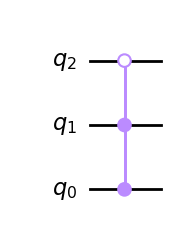

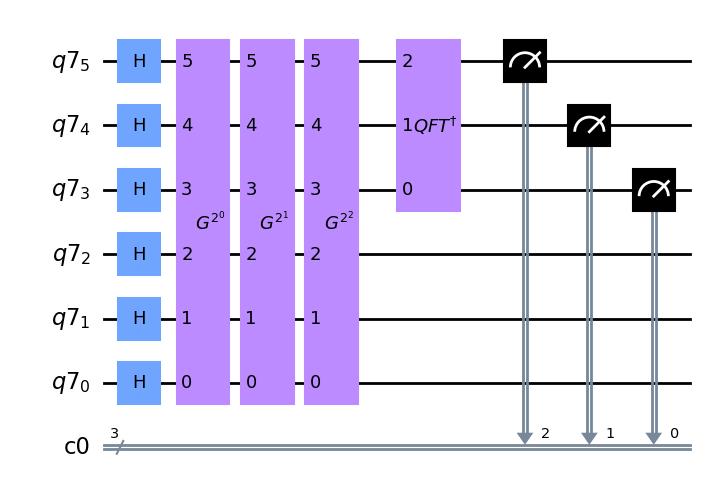

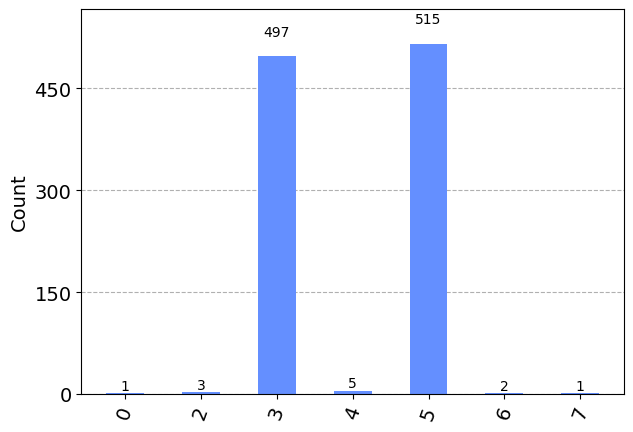

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import PhaseOracle
from qiskit.circuit.library import QFT
from qiskit.circuit.library import MCMT
import warnings
warnings.filterwarnings("ignore")

%run files/aux_func.py

#Calculamos los qubits que vamos a necesitar
p_qubits = 3
n_qubits = 3

#Creamos el operador oráculo importandolo del fichero
oraculo = PhaseOracle.from_dimacs_file("files/3sat.dimacs")
display(oraculo.draw("mpl",reverse_bits=True))

#Creación del operador Inversión sobre la media
ism_circ = QuantumCircuit(n_qubits,name = "ISM")
ism_circ.h(range(3))
ism_circ.x(range(3))
ism_circ.append(MCMT('z',num_ctrl_qubits=2,num_target_qubits=1).to_gate(),[0,1,2])
ism_circ.x(range(3))
ism_circ.h(range(3))

#oraculo.append(ism_circ,[2,1,0])
#display(oraculo.decompose(gates_to_decompose="ISM").draw("mpl",reverse_bits=True))

#Creamos el circuito del conteo cuántico
qreg = QuantumRegister(p_qubits+n_qubits)
creg = ClassicalRegister(n_qubits)
conteo_circ = QuantumCircuit(qreg,creg,name="Conteo Cuantico")

#Creamos la superposición inicial
conteo_circ.h(qreg)

#Añadir las puertas controladas
for i in range(p_qubits):
    circ_control = QuantumCircuit(qreg,name = "${{G^{{2^{{{}^{{}}}}}}}}$".format(i))
    for j in range(2**i):
        circ_control.append(oraculo.control(1),[n_qubits+i,0,1,2])
        circ_control.append(ism_circ.control(1),[n_qubits+i,0,1,2])
    conteo_circ.append(circ_control,qreg)

#Añadir la transformada d#e Fourier cuántica
conteo_circ.append(QFT(num_qubits=p_qubits,inverse=True, name='$QFT^{\dagger}$'),[3,4,5])

#Medidas
conteo_circ.measure(qreg[5],creg[2])
conteo_circ.measure(qreg[4],creg[1])
conteo_circ.measure(qreg[3],creg[0])

#Mostramos y ejecutamos
display(conteo_circ.draw("mpl",reverse_bits=True))

job = execute(conteo_circ,Aer.get_backend("qasm_simulator")).result()
counts = job.get_counts()

counts_decimal = {int(k,2):v for k,v in counts.items()}
display(plot_histogram(counts_decimal))

In [2]:
#Calculamos el número de soluciones
print("El número de soluciones es: ",calculate_solutions(3,n_qubits,p_qubits))
print("El número de soluciones es: ",calculate_solutions(5,n_qubits,p_qubits))

El número de soluciones es:  6.82842712474619
El número de soluciones es:  6.82842712474619


#### El número de soluciones del problema es 1. ¿Corresponde con el número de soluciones obtenido?

No corresponde porque la Inversión sobre la media usada es en realidad -1*ISM. Esta fase global viene en la forma que se construye el operador, y en el algoritmo de Grover no afecta, sin embargo, en este algoritmo si afecta (ya que el operador está controlado), de esta forma es como si estuviesemos calculando el número de no soluciones. Para obtener el número de soluciones debemos restar el valor obtenido a el número total de estados.

In [3]:
#Recalculamos el número de soluciones
print("El número de soluciones verdaderas es: ",round(2**n_qubits - calculate_solutions(3,n_qubits,p_qubits)))

El número de soluciones verdaderas es:  1


### Ahora vamos a construir la ISM con Numpy

La ISM se define como: $2\cdot\ket{\psi}\bra{\psi}-I$

Donde $\ket{\psi}=H^{\otimes n}\ket{0^{\otimes n}}$ e $I$ es la matriz identidad.

[[-0.75  0.25  0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25 -0.75  0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.25 -0.75  0.25  0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25 -0.75  0.25  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25 -0.75  0.25  0.25  0.25]
 [ 0.25  0.25  0.25  0.25  0.25 -0.75  0.25  0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25 -0.75  0.25]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25 -0.75]]


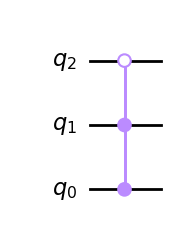

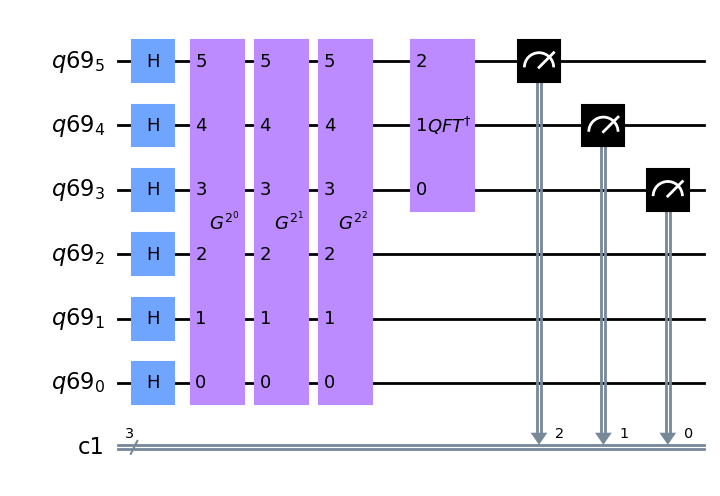

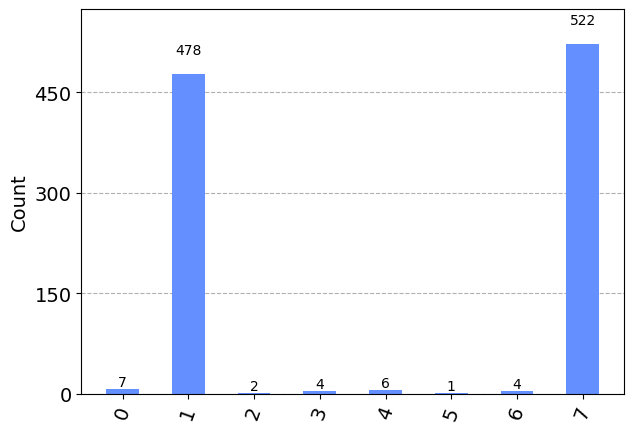

In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
from qiskit.circuit.library import PhaseOracle

n_qubits = 3

#Creamos las matrices necesarias para la puerta y creamos la puerta
plus = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
out = np.outer(plus,plus)
matriz = out
for _ in range(n_qubits-1):
    matriz = np.kron(matriz,out)

ism = 2*matriz - np.eye(2**n_qubits)
print(ism)

puertaISM = UnitaryGate(ism)

#Calculamos los qubits que vamos a necesitar
p_qubits = 3
n_qubits = 3

#Creamos el oráculo
oraculo = PhaseOracle.from_dimacs_file("files/3sat.dimacs")
display(oraculo.draw("mpl",reverse_bits=True))

#Creamos el circuito del conteo cuántico
qreg = QuantumRegister(p_qubits+n_qubits)
creg = ClassicalRegister(n_qubits)
conteo_circ = QuantumCircuit(qreg,creg,name="Conteo Cuantico")

#Creamos la superposición inicial
conteo_circ.h(qreg)

#Añadimos las puertas controladas
for i in range(p_qubits):
    circ_control = QuantumCircuit(qreg,name = "${{G^{{2^{{{}^{{}}}}}}}}$".format(i))
    for j in range(2**i):
        circ_control.append(oraculo.control(1),[n_qubits+i,0,1,2])
        circ_control.append(puertaISM.control(1),[n_qubits+i,0,1,2])
    conteo_circ.append(circ_control,qreg)

#Añadir la transformada d#e Fourier cuántica
conteo_circ.append(QFT(num_qubits=p_qubits,inverse=True, name='$QFT^{\dagger}$'),[3,4,5])

#Medidas
conteo_circ.measure(qreg[5],creg[2])
conteo_circ.measure(qreg[4],creg[1])
conteo_circ.measure(qreg[3],creg[0])

#Mostramos y ejecutamos
display(conteo_circ.draw("mpl",reverse_bits=True))

job = execute(conteo_circ,Aer.get_backend("qasm_simulator")).result()
counts = job.get_counts()

counts_decimal = {int(k,2):v for k,v in counts.items()}
display(plot_histogram(counts_decimal))

In [5]:
#Calculamos el número de soluciones
print("El número de soluciones es: ",round(calculate_solutions(1,n_qubits,p_qubits)))

El número de soluciones es:  1
